<a href="https://colab.research.google.com/github/LunaEyad/Deep-Learning-Foundations/blob/main/Lecture_2_~_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lecture 2 : gradient descent 

# Problem Statement
Find a point in $\mathbb{R}^{2}$ with the least average Euclidean distance to a set of arbitrary points

In [ ]:


from random import Random

SEED =8
random_gen = Random(x=SEED)

# for _ in range (10):
#     print(random_gen.uniform(a=1,b=10))

def generate_points(n = 1000):
    #random_gen = Random(x = SEED)

    lst_x , lst_y =[],[]
    for _ in range(n):
        lst_x.append(random_gen.uniform(a = 0, b = 1))
    # Then we will loop over range N to fill the y-coordinates list
    for _ in range(n):
        lst_y.append(random_gen.uniform(a = 0, b = 1))
    # We return x-coordinates and y-coordinates lists afterwards
    return lst_x, lst_y


data_x , data_y = generate_points()
print(data_x[:10])
print(data_y[:10])


random_gen = Random(x=SEED)
def generate_points_lst_cmp(n = 1000):
  return(
      [random_gen.uniform(a=0 ,b=1)
      for _ in range(n)],
      [
       random_gen.uniform(a=0 ,b=1)
      for _ in range(n)   
      ])
data_x , data_y = generate_points_lst_cmp()
print(data_x[:10])
print(data_y[:10])

[0.2267058593810488, 0.9622950358343828, 0.12633089865085956, 0.7048169228716079, 0.08518526805075266, 0.24744098492908506, 0.999128539162579, 0.2093976318889128, 0.641868435072107, 0.4591337627723967]
[0.5685051031594223, 0.40692776594987734, 0.026604260494635934, 0.4350271256173446, 0.5209569990951767, 0.30051808074304864, 0.408070886355976, 0.9426075145498523, 0.37246834082994396, 0.262387700966185]
[0.2267058593810488, 0.9622950358343828, 0.12633089865085956, 0.7048169228716079, 0.08518526805075266, 0.24744098492908506, 0.999128539162579, 0.2093976318889128, 0.641868435072107, 0.4591337627723967]
[0.5685051031594223, 0.40692776594987734, 0.026604260494635934, 0.4350271256173446, 0.5209569990951767, 0.30051808074304864, 0.408070886355976, 0.9426075145498523, 0.37246834082994396, 0.262387700966185]


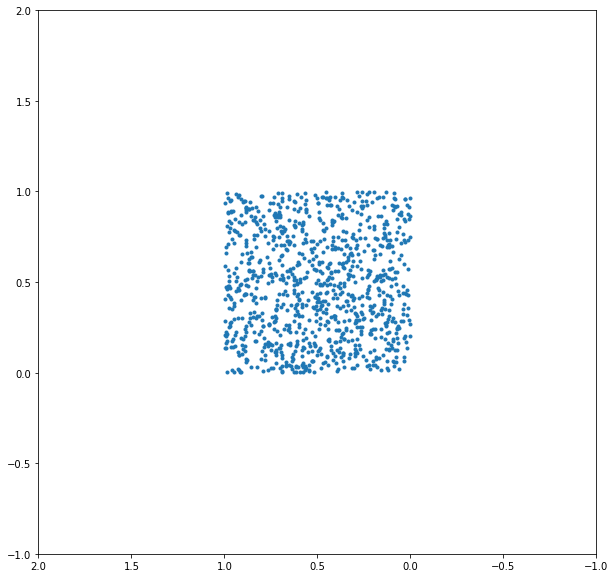

In [ ]:
from matplotlib.pyplot import figure

fig = figure(figsize = (10, 10))

ax=fig.add_subplot()
ax.scatter(x=data_x , y=data_y, marker=".")
ax.set_xlim(right=-1,left=2)
ax.set_ylim(bottom=-1,top=2)
fig.show()

# The loss function
Let:
- The solution: ($x_{p}$, $y_{p}$)
- The dataset $\mathbb{D}$ is a {($x_{i}$, $y_{i}$)}
- $\mathbb{L}$ be the loss function and the solution be
$$(x_{p}, y_{p}) = argmin(\mathbb{L})$$
<br>
$$where\;\mathbb{L} = \frac{1}{N} \sum_{i=0}^{N-1}[(x_{i} - x_{p})^{2} + (y_{i} - y_{p})^{2}]^{\frac{1}{2}}$$

In [ ]:
from math import sqrt 
def loss (x_i,y_i,x_p , y_p):
  n=len(x_i)
  return(
      (1/n) * sum([
          sqrt((x_i-x_p)**2+(y_i-y_p)**2)
          for x_i,y_i in zip(data_x,data_y)
      ])
  )
print(loss(data_x,data_y,5,5))

6.37910326314627


# Visualize loss


In [ ]:

STEP=0.01
MESHSIZE=300
def calculate_loss_mesh_comp(x_i, y_i, STEP, MESHSIZE ):
  x_mesh=[-1+i*STEP for i in range(MESHSIZE)]
  y_mesh=[-1+i*STEP for i in range(MESHSIZE)]
  loss_mesh =[ 
      
      [loss(x_i, y_i,curr_x ,curr_y) for curr_x in x_mesh]

      for curr_y in y_mesh
  ]
  return x_mesh, y_mesh, loss_mesh

x_mesh, y_mesh, loss_mesh = calculate_loss_mesh_comp(data_x, data_y,STEP, MESHSIZE)

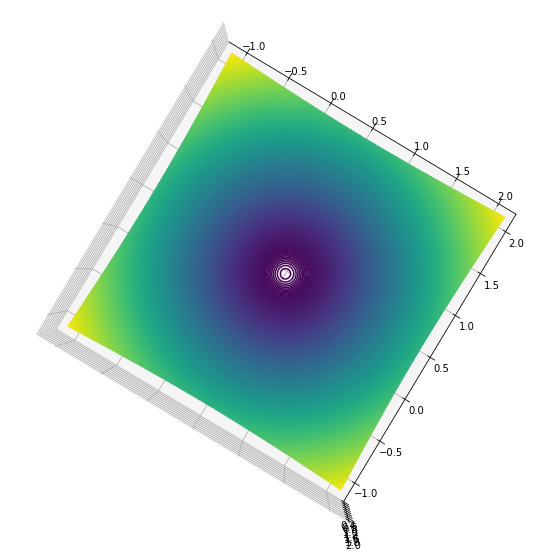

In [ ]:
from matplotlib.figure import projections
fig=figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1 ,projection="3d")
ax.contour(x_mesh,y_mesh, loss_mesh ,levels=500)
ax.view_init(elev=90)
fig.show()

# Numeric Conceptualization of Derivatives
It comes for the main definition of the derivative
<br><br>
$\frac{\partial \mathbb{L}}{\partial x} = \lim_{h \to 0} \frac{\mathbb{L}(x+h) - \mathbb{L}(x)}{h}$
<br><br>
By replacing the asymptotically infinitesimal by pragmatically small of values we can get a definition of deriviative that can be numerically computed 

In [ ]:
def find_minimum(x_i, y_i, epochs, delta, h, x_p, y_p):
  epoch_losses = []
  for i in range(epochs):
     epoch_losses.append(loss(x_i, y_i,x_p, y_p)) 


     dloss_dx = (loss(x_i, y_i, x_p + h, y_p) - loss(x_i, y_i, x_p, y_p)) / h
     dloss_dy = (loss(x_i, y_i, x_p, y_p + h) - loss(x_i, y_i, x_p, y_p)) / h
     x_p -= delta * dloss_dx
     y_p -= delta * dloss_dy
  return x_p, y_p, epoch_losses

x_p, y_p, epoch_losses=find_minimum(data_x,data_y, 1000, 0.01 , 0.001 , 5 , 5)
print(x_p,y_p)
#fig_loss_curve = figure(figsize = (10, 10))
#ax_loss_curve = fig_loss_curve.add_subplot(1, 1, 1)
#ax_loss_curve.plot(epoch_losses)
#ax_loss_curve.title.set_text("Training at 1000 epochs")
#fig_loss_curve.show()

0.4970216931950838 0.47169200364136965


#close form evaluation of the gradient
(gradient is the dervitve of the loss function with respect to the parameters)

The derivative can be also calculated in a closed form solution.

$\frac{\partial \mathbb{L}}{\partial x_p} = -\frac{1}{N} \sum_{i=0}^{N-1}((x_i - x_p)^2 + (y_i - y_p)^2)^\frac{-1}{2}(x_i - x_p)$
<br>
$\frac{\partial \mathbb{L}}{\partial y_p} = -\frac{1}{N} \sum_{i=0}^{N-1}((x_i - x_p)^2 + (y_i - y_p)^2)^\frac{-1}{2}(y_i - y_p)$

In [ ]:
def calc_grad(x_p,y_p):
  sum_x, sum_y= 0, 0
  for x_i ,y_i in zip(data_x ,data_y):
    inv_sqr= ((x_i - x_p)**2 + (y_i - y_p)**2 )**(-0.5)
    sum_x+= inv_sqr * (x_i - x_p)
    sum_y+= inv_sqr * (y_i - y_p)
  return( -sum_x / len(data_x), -sum_y / len(data_y) )

x_p , y_p= 5 , 5 

print (f"calac grad : {calc_grad(x_p,y_p)}")

h=0.01
dloss_dx = (loss( data_x, data_y ,x_p + h, y_p) - loss(data_x, data_y , x_p, y_p)) / h
dloss_dy = (loss( data_x,data_y, x_p, y_p + h) - loss( data_x, data_y ,x_p, y_p)) / h

print(f"orginal form : ({dloss_dx },{dloss_dy})")

calac grad : (0.7046620641766728, 0.7081276389819654)
orginal form : (0.7050562160539897,0.7085180315941741)
